In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [2]:
rng = np.random.default_rng(42)

**4.** Let $X_1, \dots, X_n \sim \text{Bernoulli}(p)$, let $\hat{p}_n = \frac{1}{n} \sum_{i=1}^n X_i$ and let
$$
    \epsilon_n = \sqrt{\frac{1}{2n} \log \left( \frac{2}{\alpha} \right)}
$$
Recall that the interval $C_n \coloneqq (\hat{p}_n - \epsilon_n, \hat{p}_n + \epsilon_n)$ satisfies $P(p \in C_n) \geq 1-\alpha$. Conduct a simulation study to see how often the interval contains $p$ (called the coverage). Do this for various values of $n$ between 1 and 10,000. Plot the coverage versus $n$. Then plot the length of the interval versus $n$. Notice that if we want the length of the interval to be no more than $\delta$, then we need $n$ such that
$$
    \hat{p}_n + \epsilon_n - (\hat{p}_n - \epsilon_n) = 2\epsilon_n = 2 \sqrt{\frac{1}{2n} \log \left( \frac{2}{\alpha} \right)} < \delta.
$$
Equivalently,
$$
    n > \frac{2\log(2/\alpha)}{\delta^2}
$$
Compare this with the plot.

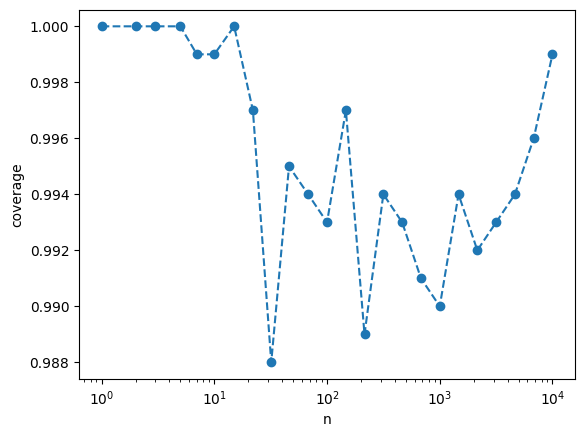

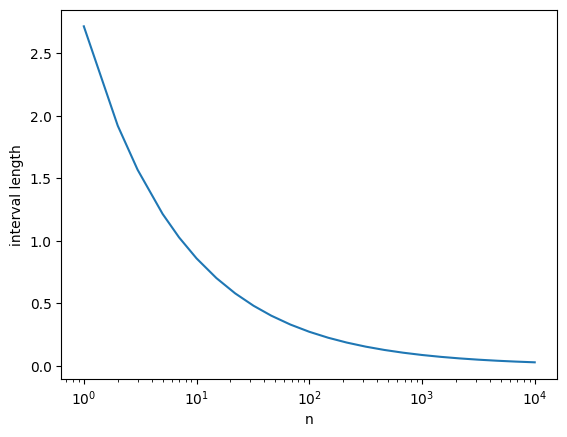

In [3]:
alpha = 0.05
p = 0.4

n_list = np.unique(np.rint(np.logspace(0, 4, 25)).astype(int)).tolist()
coverage = []

for n in n_list:
    count = 0
    epsilon_n = np.sqrt(1/(2*n)*np.log(2/alpha))
    for _ in range(1000):
        b = rng.choice(a=[0,1], p=[1-p,p], size=n)
        p_hat = np.mean(b)
        if p_hat - epsilon_n < p and p < p_hat + epsilon_n:
            count += 1
    coverage.append(count/1000)

plt.plot(n_list, coverage, marker='o', linestyle='--')
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('coverage')
plt.show()

plt.plot(n_list, [2*np.sqrt(1/(2*n)*np.log(2/alpha)) for n in n_list])
plt.xscale('log')
plt.xlabel('n')
plt.ylabel('interval length')
plt.show()

**6.** Let $Z \sim N(0,1)$. Plot $P(|Z|>t) = 2(1-\Phi(t))$ as a function of $t$.
Recall that from Markov's inequality, $P(|Z|>t) \leq \frac{E(|Z|^k)}{t^k}$ for any $k>0$. Plot these bounds for $k=1,2,3$ using the fact that 
$$
E(|Z|^k) = \frac{2^{k/2}}{\sqrt{\pi}} \cdot \Gamma \left(\frac{k+1}{2}\right).
$$
Also plot the bound from Mill's inequality.

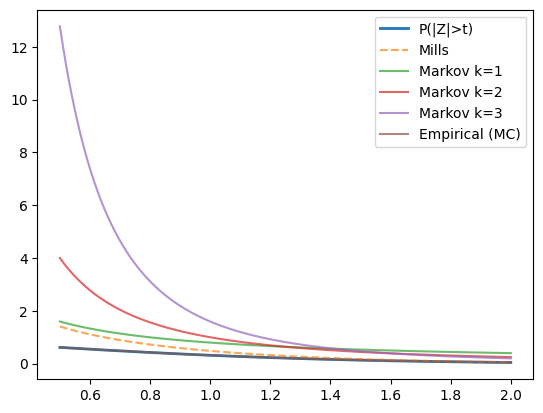

In [4]:
t = np.linspace(0.5, 2, 2000)

true = 2 * (1 - norm.cdf(t))
mills = math.sqrt(2/math.pi) * np.exp(-0.5*t**2) / t
markov = [(2**(k/2)) / math.sqrt(math.pi) * math.gamma((k+1)/2) / (t**k) for k in range(1, 4)]

x = rng.normal(size=200_000)
emp_tail = (np.abs(x)[:, None] > t).mean(axis=0)
# the t-th value of the empirical tail is 
# the proportion of simulated values of |Z| that lie above t

plt.figure()
plt.plot(t, true, label='P(|Z|>t)', linewidth=2)
plt.plot(t, mills, '--', label="Mills", alpha=0.7)
for k in range(1, 4):
    plt.plot(t, markov[k-1], label=f'Markov k={k}', alpha=0.7)
plt.plot(t, emp_tail, label='Empirical (MC)', alpha=0.7)
plt.legend()
plt.show()